In [1]:
# IMPORT THE PACKAGE NEEDED TO PROCESS A GENERATED MOCK CATALOG
import sys
sys.path.append("../py")

import catalog as catalog
import galaxy as galaxy
import numpy as np

import pickle

In [2]:
# THE DATA IS STORED IN A PICKLE FILE AND IT IS A CONTAINER OF CATALOG OBJECT
data = pickle.load(open("../examples/mocks_DESI_testing_complete.pkl", "rb"))

In [3]:
# THE INFORMATION ABOUT THE CONFIGURATION IS ALSO STORED IN THE PICKLE FILE
# THE DISTANCE PARAMETERS IN THE CONFIGURATION ARE ALL IN ''Mpc''
configuration = data['config']
mock_cat      = data['catalog']
for key in configuration:
    print("{}: {}".format(key, configuration[key]))

n_rand: 2000000
n_cl: 30
n_rim: 30
frac_c2r: None
frac_f2c: None
n_center: 200
omega_m0: 0.31
n_flat: 200
H_0: 70.0
r_BAO: 153.0
n_cl_center: 30
nr_cl: 350
sig_r_BAO: 5.0
r_0: 5.0
gamma: 2.4


In [20]:
# HERE IS AN EXAMPLE TO GET THE SEED GALAXY FOR A SELECTED GALAXY
# IN THE EXAMPLE, WE ARE CHECKING A CLUMP GALAXY WHICH HAS A CENTER GALAXY AS SEED
seed_idx = get_seed("cenClump_147_8_21")
print("Information about the selected galaxy:")
mock_cat.info("cenClump_147_8_21")
print("Information about the seed galaxy:")
mock_cat.info("rim_147_8")
print("Information about the seed galaxy of the seed galaxy:")
mock_cat.info("cen_147")

Information about the selected galaxy:
Galaxy (clump_center)
  Name:   None
  RA:     -159.89621837176097
  Dec:    53.682884866938906
  Dist:   1917.6409590281733
  Prnt:   rim_147_8
Information about the seed galaxy:
Galaxy (rim)
  Name:   None
  RA:     -158.92574661980916
  Dec:    53.52262026457048
  Dist:   1903.8330313591955
  Prnt:   cen_147
Information about the seed galaxy of the seed galaxy:
Galaxy (center)
  Name:   None
  RA:     -154.40214308618636
  Dec:    56.95252726257709
  Dist:   1848.8382491982325


/home/tyapici/anaconda/anaconda3/envs/desi/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ["'serif'"] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/tyapici/anaconda/anaconda3/envs/desi/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ["'serif'"] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


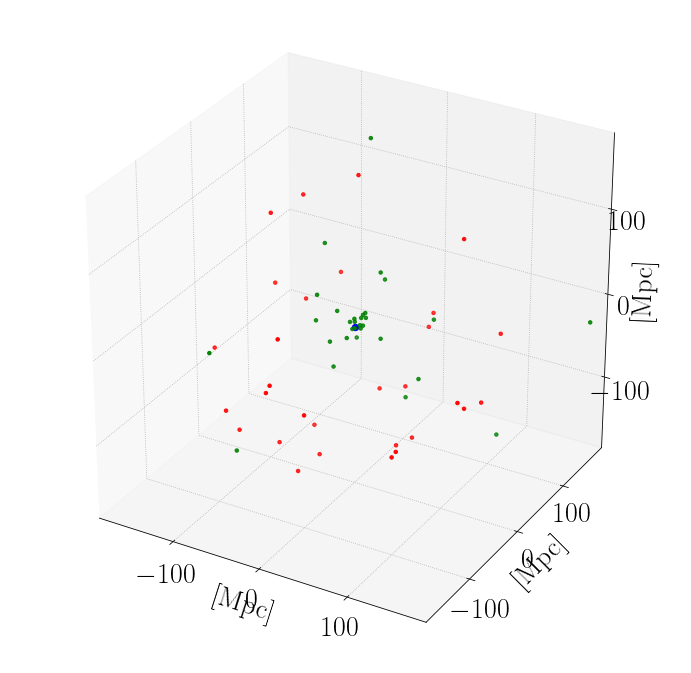

In [19]:
#
# THIS PART IS COPIED FROM THE CATALOG CLASS FOR GRAPHICAL DEMONSTRATION
#
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
plt.style.use("good_config")

idx = "cen_147"
x_cen, y_cen, z_cen, c_cen = mock_cat.get_points(idx, get_childs=False)
fig = plt.figure(figsize=(12,12))
ax  = fig.add_subplot(111, projection='3d')
x, y, z, c = mock_cat.get_points(idx, get_childs=True)
ax.scatter(xs=np.asarray(x).flatten()-x_cen[0], ys=np.asarray(y).flatten()-y_cen[0], zs=np.asarray(z).flatten()-z_cen[0], c=c, s=12)
ax.scatter(xs=0, ys=0, zs=0, c='blue', s=40)
ax.set_xlim(-180., 180.)
ax.set_ylim(-180., 180.)
ax.set_zlim(-180., 180.)
ax.set_xlabel("[Mpc]")
ax.set_ylabel("[Mpc]")
ax.set_zlabel("[Mpc]")
plt.show()